<a href="https://colab.research.google.com/github/SungChul23/Bixby/blob/master/%EC%A0%84%EA%B8%B0%EC%9A%94%EA%B8%88_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!sudo apt-get install -y fonts-nanum&&sudo fc-cache -fv&&rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import os
os.listdir('/content/drive/MyDrive/빅데이터 컴퓨팅')


['5주차',
 '11주차',
 '12주차',
 '과제',
 '14주차',
 '전기요금분석.csv',
 '찐촤종전기요금분석.xlsx']

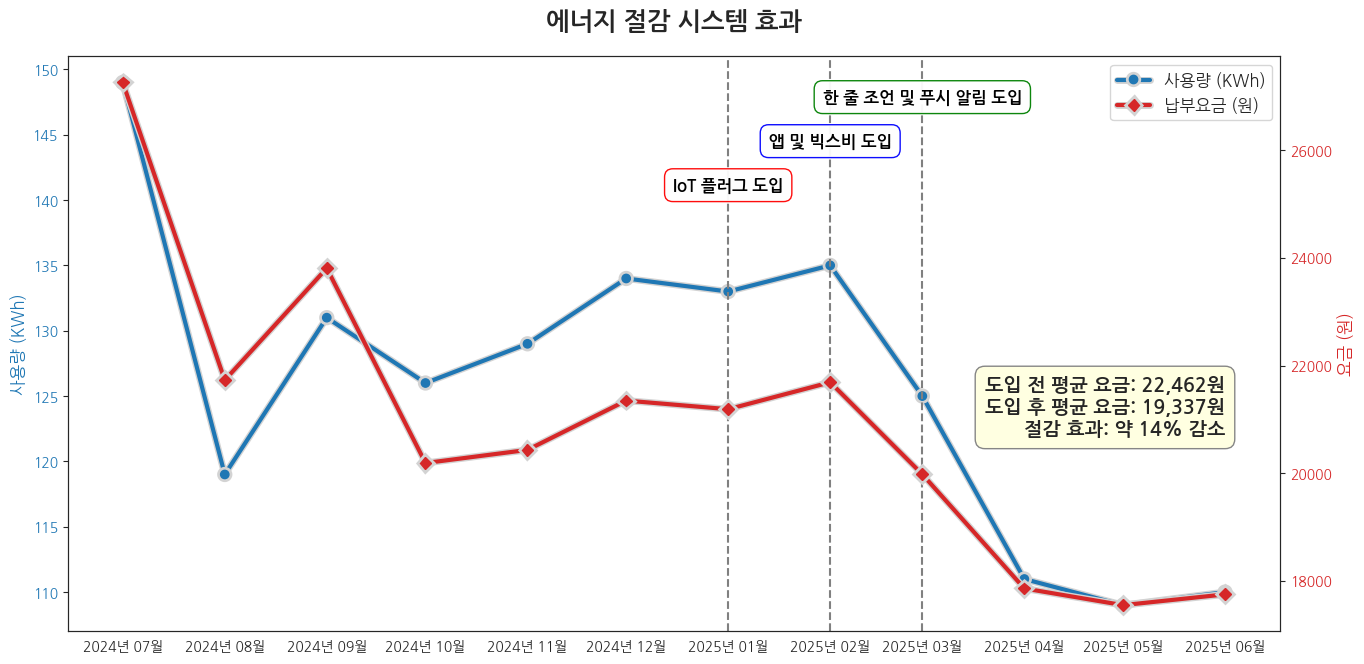

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
import seaborn as sns
import platform

# 한글 폰트 자동 설정


# 스타일 적용
sns.set_style("white")  # 깨끗한 바탕

# 데이터 불러오기
file_path = '/content/drive/MyDrive/빅데이터 컴퓨팅/전기요금분석_사용기간수정_2024_2025.csv'
df = pd.read_csv(file_path, encoding='cp949')
df = df[['사용기간', '사용량(Kwh)', '납부요금']]
df.columns = ['사용기간', '사용량', '납부요금']
plt.rcParams['font.family'] = 'NanumGothic'
# 사용기간을 datetime으로 변환
df['사용기간'] = pd.to_datetime(df['사용기간'].str.replace('월', '').str.strip(), format='%Y %m')
df['납부요금'] = df['납부요금'].astype(str).str.replace(',', '').astype(int)
df = df.sort_values('사용기간')

# 이벤트 날짜 (모두 2025년으로 이동)
iot_date = pd.to_datetime('2025-01', format='%Y-%m')
app_bixby_date = pd.to_datetime('2025-02', format='%Y-%m')
advice_push_date = pd.to_datetime('2025-03', format='%Y-%m')

# 요금 절감 효과 분석
before = df[df['사용기간'] < iot_date]['납부요금']
after = df[df['사용기간'] >= iot_date]['납부요금']
avg_before = before.mean()
avg_after = after.mean()
rate = (avg_before - avg_after) / avg_before * 100

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#ffffff')  # 하얀 배경

# 사용량 그래프
line1, = ax1.plot(df['사용기간'], df['사용량'], marker='o', linewidth=3, color='#1f77b4',
                  label='사용량 (KWh)',
                  path_effects=[pe.Stroke(linewidth=5, foreground='lightgray'), pe.Normal()])
ax1.set_ylabel('사용량 (KWh)', color='#1f77b4', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# 납부요금 그래프
ax2 = ax1.twinx()
line2, = ax2.plot(df['사용기간'], df['납부요금'], marker='D', linewidth=3, color='#d62728',
                  label='납부요금 (원)',
                  path_effects=[pe.Stroke(linewidth=5, foreground='lightgray'), pe.Normal()])
ax2.set_ylabel('요금 (원)', color='#d62728', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#d62728')

# 이벤트 세로선
for event_date in [iot_date, app_bixby_date, advice_push_date]:
    ax1.axvline(x=event_date, color='gray', linestyle='--', linewidth=1.5)

# 이벤트 텍스트 박스
def draw_event(date, y, text, edge_color):
    ax2.text(date, y, text,
             ha='center', va='center',
             fontsize=12, fontweight='bold', color='black',
             bbox=dict(facecolor='#fefefe', edgecolor=edge_color, boxstyle='round,pad=0.5', alpha=0.95))

# 박스 위치 조정
draw_event(iot_date, df['납부요금'].max()*0.93, 'IoT 플러그 도입', 'red')
draw_event(app_bixby_date, df['납부요금'].max()*0.96, '앱 및 빅스비 도입', 'blue')
draw_event(advice_push_date, df['납부요금'].max()*0.99, '한 줄 조언 및 푸시 알림 도입', 'green')

# X축: 매월 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # 모든 월 표시
plt.xticks(rotation=45)

# 십자선(grid) 제거
ax1.grid(False)
ax2.grid(False)

# 범례
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right', fontsize=12)

# 요약 박스
ax2.text(df['사용기간'].max(), df['납부요금'].max()*0.8,
          f'도입 전 평균 요금: {avg_before:,.0f}원\n도입 후 평균 요금: {avg_after:,.0f}원\n절감 효과: 약 {rate:.0f}% 감소',
          fontsize=14, fontweight='bold', ha='right', va='top',
          bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.5', alpha=0.95))

# 제목
plt.title('에너지 절감 시스템 효과', fontsize=18, fontweight='bold', pad=20)

# 레이아웃 조정
plt.tight_layout(pad=2)
plt.show()


In [5]:
# Colab에서 한글 폰트 설치
!apt-get -qq install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
